In [15]:
import pandas as pd #to help with tables
import numpy as np  #to help with array
import matplotlib.pyplot as plt 
%matplotlib inline
import os
import seaborn as sns


In [3]:
os.getcwd()

'/home/ec2-user/SageMaker'

In [16]:
#import dataset 
travel_insurance = pd.read_csv(r'travel_insurance.csv')
travel_insurance

,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Travel_Duration,Destination,Net_Sales,Commision,Gender,Age
0,EPX,Travel Agency,Online,Cancellation Plan,No,28,ALBANIA,80.0,0.0,NaN,36
1,LWC,Travel Agency,Online,Single Trip Travel Protect Platinum,No,2,ANGOLA,0.0,16.0,M,19
2,EPX,Travel Agency,Online,1 way Comprehensive Plan,No,2,ARGENTINA,24.0,0.0,NaN,36
3,EPX,Travel Agency,Online,Cancellation Plan,No,3,ARGENTINA,18.0,0.0,NaN,36
4,EPX,Travel Agency,Online,Cancellation Plan,No,6,ARGENTINA,75.0,0.0,NaN,36
...,...,...,...,...,...,...,...,...,...,...,...
63321,EPX,Travel Agency,Online,Cancellation Plan,No,11,ZAMBIA,33.0,0.0,NaN,36
63322,EPX,Travel Agency,Online,2 way Comprehensive Plan,No,40,ZAMBIA,-96.0,0.0,NaN,36
63323,EPX,Travel Agency,Online,Cancellation Plan,No,23,ZIMBABWE,24.0,0.0,NaN,36
63324,EPX,Travel Agency,Online,Cancellation Plan,No,46,ZIMBABWE,46.0,0.0,NaN,36


In [17]:
#check for null values 
travel_insurance.isnull().sum()

Agency                      0
Agency_Type                 0
Distribution_Channel        0
Product_Name                0
Claim                       0
Travel_Duration             0
Destination                 0
Net_Sales                   0
Commision                   0
Gender                  45107
Age                         0
dtype: int64

In [18]:
#replace null values: NaN with other 
travel_insurance['Gender'].fillna('Other', inplace=True)

(array([1.2000e+01, 9.0000e+00, 2.3000e+01, 4.0000e+01, 1.6900e+02,
        1.5710e+03, 3.4660e+03, 6.4820e+03, 5.5730e+03, 2.6964e+04,
        3.2300e+03, 3.1470e+03, 4.2690e+03, 2.2480e+03, 1.5310e+03,
        1.3910e+03, 9.5500e+02, 6.1100e+02, 3.4200e+02, 1.5000e+02,
        9.6000e+01, 5.1000e+01, 1.2000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.8400e+02]),
 array([  0.        ,   3.93333333,   7.86666667,  11.8       ,
         15.73333333,  19.66666667,  23.6       ,  27.53333333,
         31.46666667,  35.4       ,  39.33333333,  43.26666667,
         47.2       ,  51.13333333,  55.06666667,  59.        ,
         62.93333333,  66.86666667,  70.8       ,  74.73333333,
         78.66666667,  82.6       ,  86.53333333,  90.46666667,
         94.4       ,  98.33333333, 102.26666667, 106.2       ,
        110.13333333, 114.06666667, 118.        ]),
 <BarContainer object of 30 artists>)

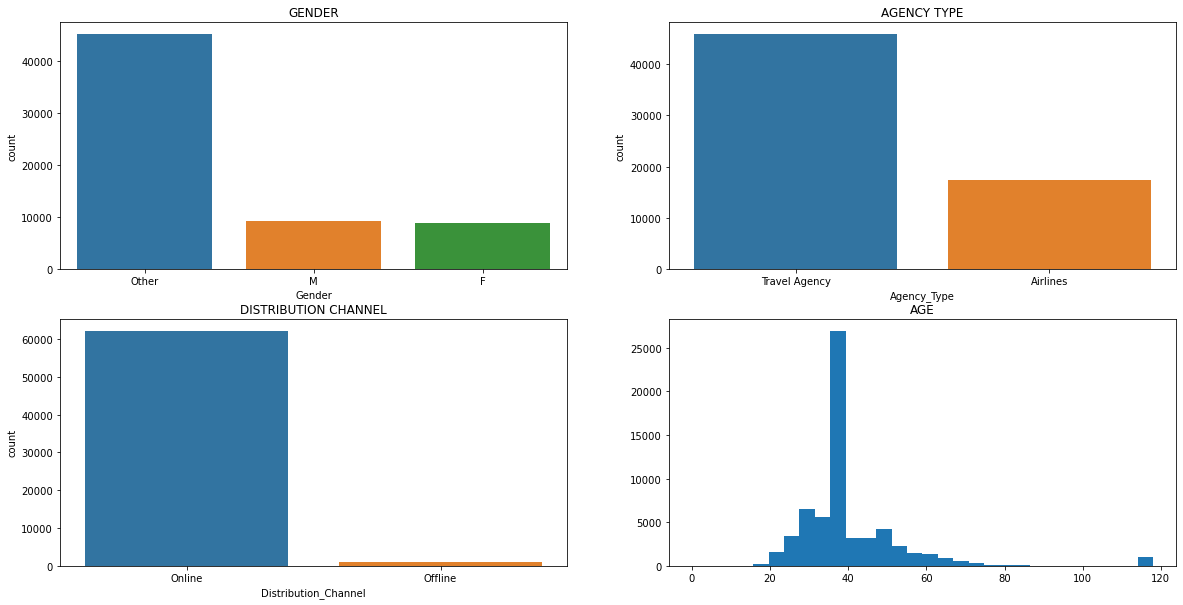

In [92]:
plt.figure(figsize(20,10))

#show gender distribution
plt.subplot(2,2,1)
plt.title('GENDER')
sns.countplot(travel_insurance['Gender'])

#show travel agency type distribution
plt.subplot(2,2,2)
plt.title('AGENCY TYPE')
sns.countplot(travel_insurance['Agency_Type'])

#show channel distribution
plt.subplot(2,2,3)
plt.title('DISTRIBUTION CHANNEL')
sns.countplot(travel_insurance['Distribution_Channel'])

#show age distribution
plt.subplot(2,2,4)
plt.title('AGE')
plt.hist(travel_insurance['Age'],bins=30)



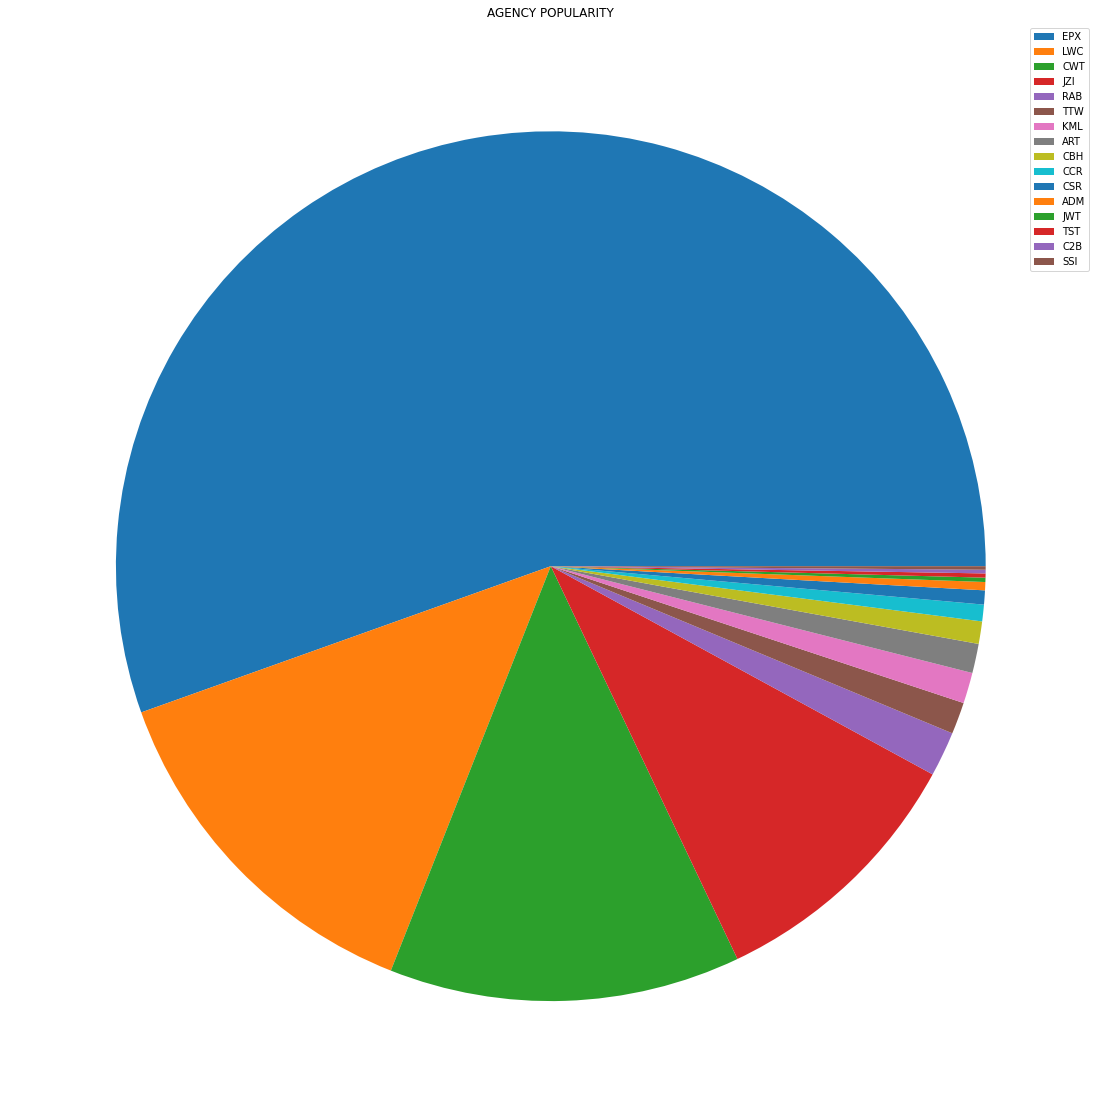

In [20]:
#showing agency distribution in a pie chart
plt.figure(figsize(20,20))
plt.title('AGENCY POPULARITY')
plt.pie(travel_insurance['Agency'].value_counts())
plt.legend(travel_insurance['Agency'].unique())



In [21]:
#seperate the status claims 
claimed_insurance = travel_insurance.loc[travel_insurance['Claim']=='Yes']
unclaimed_insurance = travel_insurance.loc[travel_insurance['Claim']=='No']

<AxesSubplot:title={'center':'UNCLAIMED INSURANCE'}, xlabel='Agency', ylabel='Total Net Sales'>

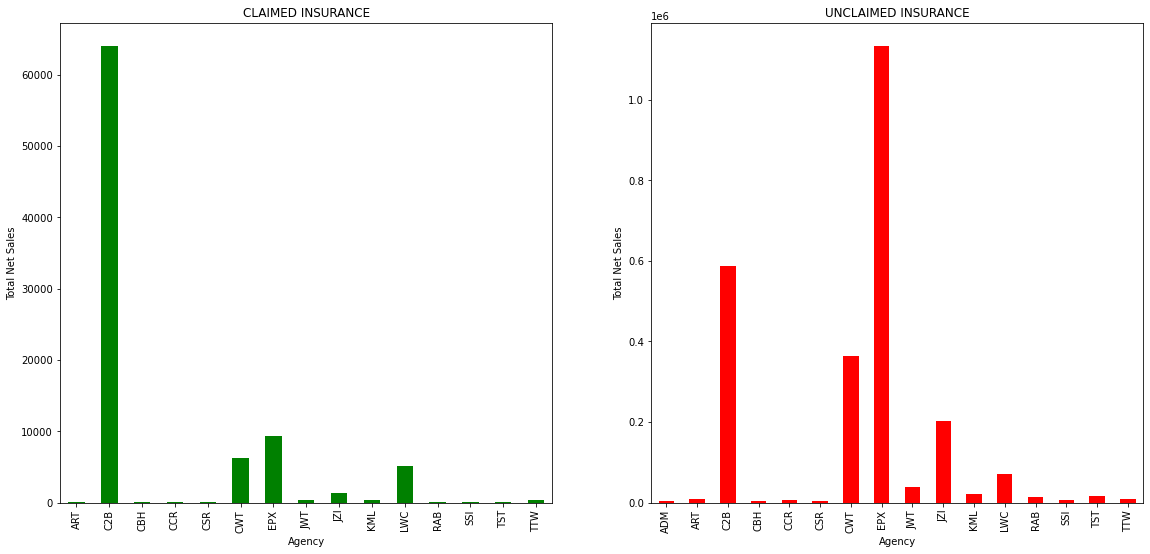

In [22]:
plt.figure(figsize(30,30))

#claimed status = YES
plt.subplot(3,3,1)
plt.title('CLAIMED INSURANCE')
plt.ylabel('Total Net Sales')
claimed_insurance.groupby(['Agency'])['Net_Sales'].sum().plot(kind='bar', color='green')

#claimed status = NO
plt.subplot(3,3,2)
plt.title('UNCLAIMED INSURANCE')
plt.ylabel('Total Net Sales')
unclaimed_insurance.groupby(['Agency'])['Net_Sales'].sum().plot(kind='bar', color='red')


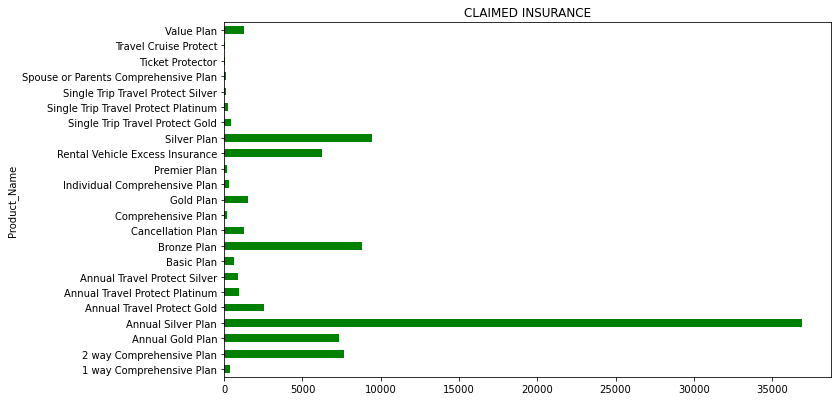

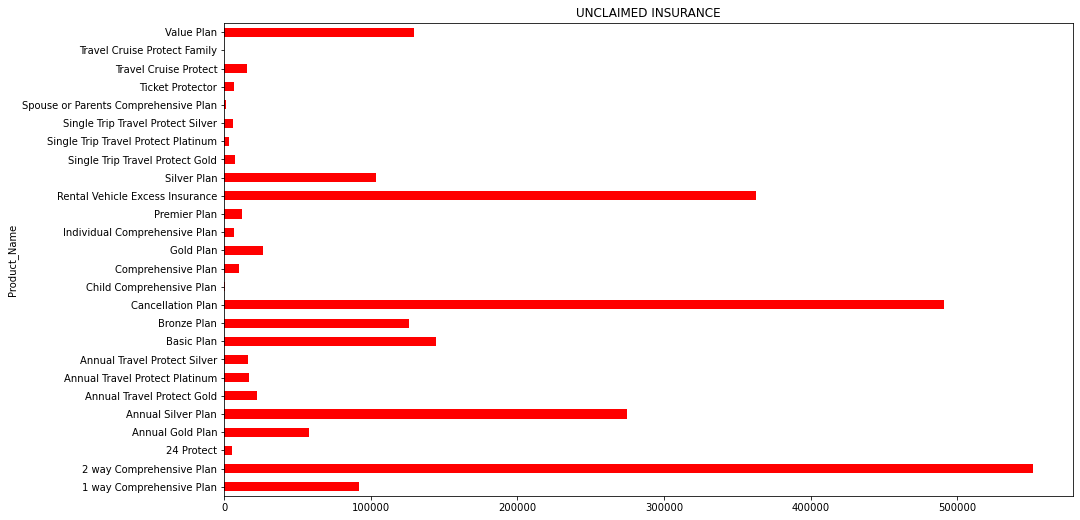

In [44]:
plt.figure(figsize(50,30))
plt.subplot(4,4,1)
plt.title('CLAIMED INSURANCE')
ci = claimed_insurance.groupby(['Product_Name'])['Net_Sales'].sum().plot(kind='barh', color='green')


plt.figure(figsize(70,40))
plt.subplot(4,4,2)
plt.title('UNCLAIMED INSURANCE')
ui = unclaimed_insurance.groupby(['Product_Name'])['Net_Sales'].sum().plot(kind='barh', color='red')


In [113]:
#reset index to make use of proper sorting
ci = claimed_insurance.groupby(['Product_Name'])['Net_Sales'].sum().reset_index()
ui = unclaimed_insurance.groupby(['Product_Name'])['Net_Sales'].sum().reset_index()

<AxesSubplot:ylabel='Product_Name'>

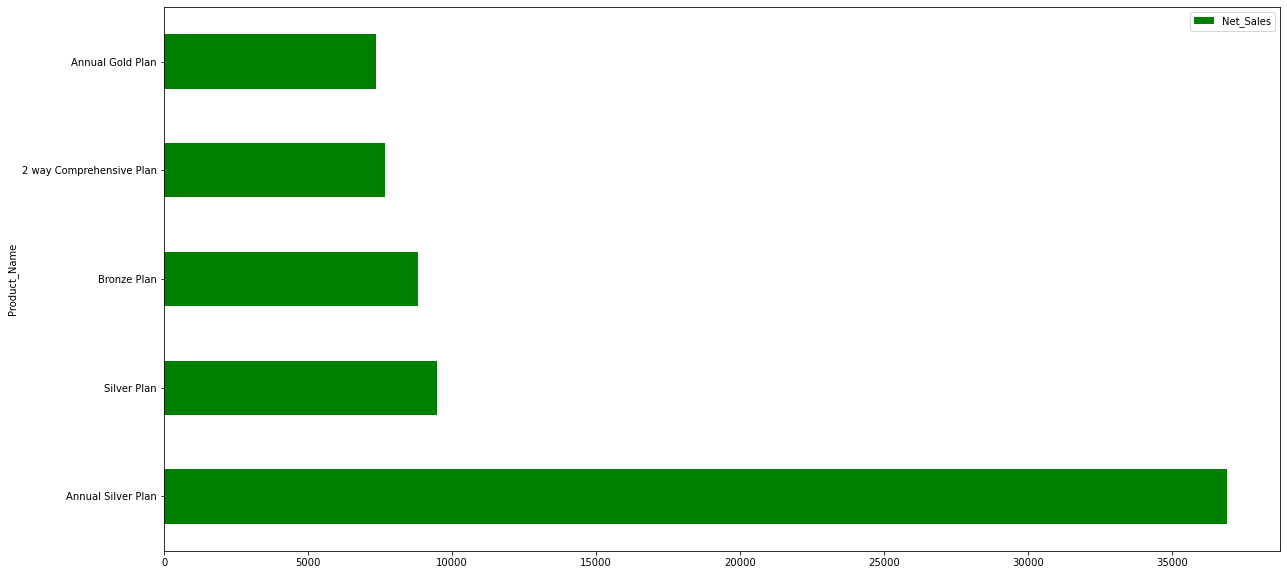

In [114]:
# The top 5 highest selling product for claimed insurance 
ci.sort_values(['Net_Sales'], ascending =False).head(5).plot(kind='barh', y='Net_Sales', x='Product_Name', color='green')


<AxesSubplot:ylabel='Product_Name'>

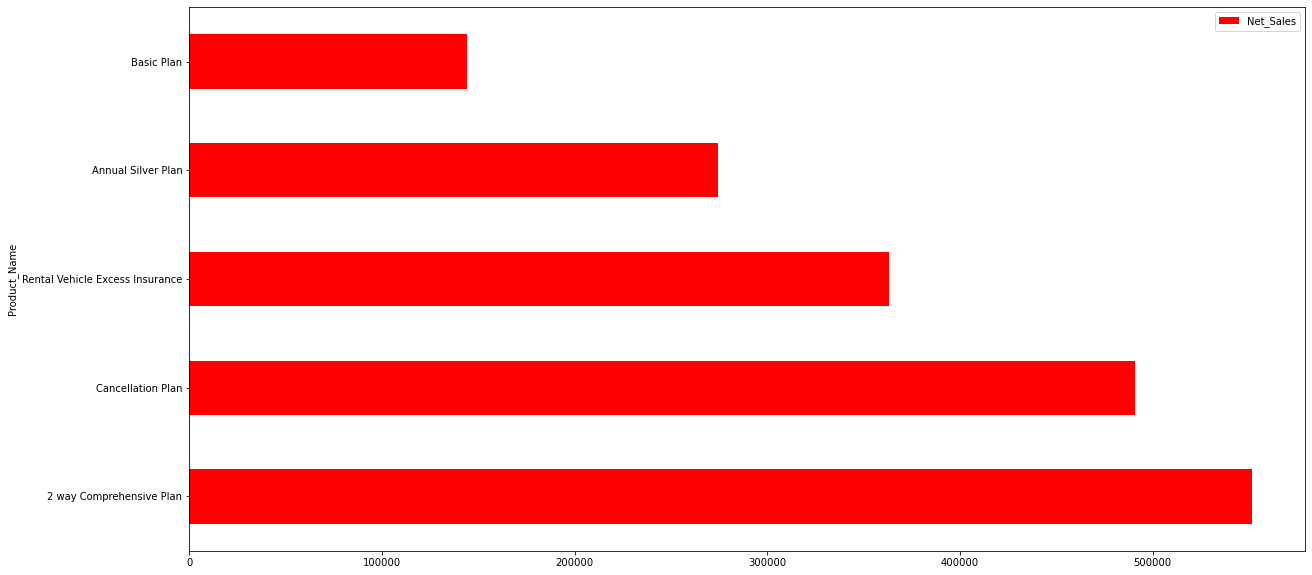

In [115]:
# The top 5 highest selling product for unclaimed insurance 
ui.sort_values(['Net_Sales'], ascending=False).head(5).plot(kind='barh', y='Net_Sales', x='Product_Name', color='red')